## Data Wrangling Recap

Load the penguins .csv files for the three years and with all penguins in one data frame answer the questions below.

In [1]:
import pandas as pd
import numpy as np
import re

#### Which three species of penguins do we have?

In [2]:
def read_file(url):
    '''this function is to read file from local path.'''
    with open(url) as f:
        df = pd.read_csv(url,decimal=';')
        df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('___','').str.replace('_','')
    return df

#### How many penguins do we have in each island?

In [3]:
df1 = read_file('../data/penguins_2007.csv')
df2 = read_file('../data/penguins_2008.csv')
df3 = read_file('../data/penguins_2009.csv')

<ipython-input-2-694882d047cc>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('___','').str.replace('_','')


#### How many penguins from each species do we have in each island?

In [4]:
df1.head(5)

,unnamed:0,species,island,stage,dateegg,bodymass,sex,penguinid
0,0,Adelie,Torgersen,"Adult,2 Eggs",2007-11-11,3750.0,MALE,N1A1
1,1,Adelie,Torgersen,"Adult,2 Eggs",2007-11-11,3800.0,FEMALE,N1A2
2,2,Adelie,Torgersen,"Adult,1 Eggs",2007-11-16,3250.0,FEMALE,N2A1
3,4,Adelie,Torgersen,"Adult,2 Eggs",2007-11-16,3450.0,FEMALE,N3A1
4,5,Adelie,Torgersen,"Adult,1 Eggs",2007-11-16,3650.0,MALE,N3A2


#### Are there differences between Adult and Juvenile penguins?

In [5]:
df2.head(5)

,unnamed:0,species,island,stage,dateegg,bodymass,sex,penguinid
0,50,Adelie,Biscoe,"Adult,2 Eggs",2008-11-06,3500.0,FEMALE,N21A1
1,51,Adelie,Biscoe,"Adult,2 Eggs",2008-11-06,4300.0,MALE,N21A2
2,52,Adelie,Biscoe,"Adult,1 Eggs",2008-11-09,3450.0,FEMALE,N22A1
3,53,Adelie,Biscoe,"Adult,2 Eggs",2008-11-09,4050.0,MALE,N22A2
4,54,Adelie,Biscoe,"Adult,2 Eggs",2008-11-09,2900.0,FEMALE,N23A1


In [6]:
df3.head(5)

,unnamed:0,species,island,stage,dateegg,bodymass,sex,penguinid
0,100,Adelie,Biscoe,"Adult,1 Eggs",2009-11-09,3725.0,FEMALE,N47A1
1,101,Adelie,Biscoe,"Adult,2 Eggs",2009-11-09,4725.0,MALE,N47A2
2,102,Adelie,Biscoe,"Adult,2 Eggs",2009-11-15,3075.0,FEMALE,N49A1
3,103,Adelie,Biscoe,"Adult,2 Eggs",2009-11-15,4250.0,MALE,N49A2
4,104,Adelie,Biscoe,"Adult,2 Eggs",2009-11-15,2925.0,FEMALE,N51A1


In [7]:
df1.info(), df2.info(), df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   unnamed:0  103 non-null    int64 
 1   species    103 non-null    object
 2   island     103 non-null    object
 3   stage      103 non-null    object
 4   dateegg    103 non-null    object
 5   bodymass   103 non-null    object
 6   sex        103 non-null    object
 7   penguinid  103 non-null    object
dtypes: int64(1), object(7)
memory usage: 6.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   unnamed:0  113 non-null    int64 
 1   species    113 non-null    object
 2   island     113 non-null    object
 3   stage      113 non-null    object
 4   dateegg    113 non-null    object
 5   bodymass   113 non-null    object
 6   sex        113 non-null    object
 

(None, None, None)

In [8]:
def df_concat(df1, df2, df3):
    df = pd.concat(
    [df1,df2,df3],
    axis=0,
    join="outer",
    ignore_index=False,
    keys=None,
    levels=None,
    names=None,
    verify_integrity=False,
    copy=True,
)
    return df

In [9]:
df=df_concat(df1, df2, df3)

#### How many eggs do we have in each island?

In [10]:
df['stage1'], df['Eggs'] = df.stage.str.split(expand=True)
# if i have 2 string columns, join 2 columns into 1. 

In [43]:
df['Eggs'].astype(int)

0      1
1      1
2      1
3      1
4      1
      ..
113    1
114    1
115    1
116    1
117    1
Name: Eggs, Length: 334, dtype: int64

<AxesSubplot:xlabel='island'>

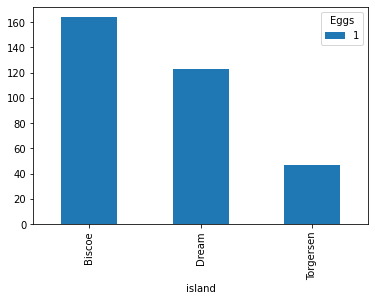

In [11]:
eggs_cal = df['Eggs'].groupby(df['island'])
eggs_cal.value_counts().unstack().plot(kind='bar',stacked = False)

#### How has the number of eggs changed per year?

In [12]:
df['dateegg']=pd.to_datetime(df['dateegg'])

In [13]:
df['year']=df.iloc[:,4].dt.year

In [14]:
df.head(5)

,unnamed:0,species,island,stage,dateegg,bodymass,sex,penguinid,stage1,Eggs,year
0,0,Adelie,Torgersen,"Adult,2 Eggs",2007-11-11,3750.0,MALE,N1A1,0,1,2007
1,1,Adelie,Torgersen,"Adult,2 Eggs",2007-11-11,3800.0,FEMALE,N1A2,0,1,2007
2,2,Adelie,Torgersen,"Adult,1 Eggs",2007-11-16,3250.0,FEMALE,N2A1,0,1,2007
3,4,Adelie,Torgersen,"Adult,2 Eggs",2007-11-16,3450.0,FEMALE,N3A1,0,1,2007
4,5,Adelie,Torgersen,"Adult,1 Eggs",2007-11-16,3650.0,MALE,N3A2,0,1,2007


<AxesSubplot:xlabel='year'>

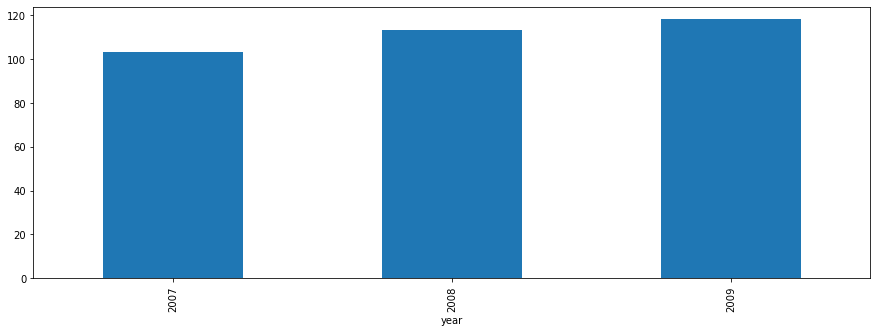

In [59]:
#df.groupby('year')['Eggs'].value_counts().unstack().plot(figsize=(15,5))
df.groupby('year')['Eggs'].sum().plot(figsize=(15,5))
df.groupby('year')['Eggs'].sum().plot(kind='bar',figsize=(15,5))

In [63]:
# to be finished
#df.groupby(['year'],['species'])['Eggs'].sum()

#### In which month do penguins lay most of their eggs?

In [16]:
df['month']=df.iloc[:,4].dt.month

In [17]:
df.head(5)

,unnamed:0,species,island,stage,dateegg,bodymass,sex,penguinid,stage1,Eggs,year,month
0,0,Adelie,Torgersen,"Adult,2 Eggs",2007-11-11,3750.0,MALE,N1A1,0,1,2007,11
1,1,Adelie,Torgersen,"Adult,2 Eggs",2007-11-11,3800.0,FEMALE,N1A2,0,1,2007,11
2,2,Adelie,Torgersen,"Adult,1 Eggs",2007-11-16,3250.0,FEMALE,N2A1,0,1,2007,11
3,4,Adelie,Torgersen,"Adult,2 Eggs",2007-11-16,3450.0,FEMALE,N3A1,0,1,2007,11
4,5,Adelie,Torgersen,"Adult,1 Eggs",2007-11-16,3650.0,MALE,N3A2,0,1,2007,11


<AxesSubplot:xlabel='month'>

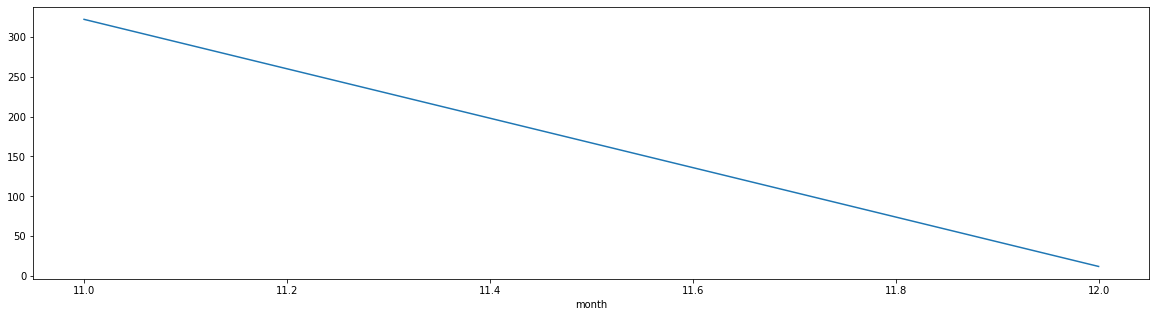

In [51]:
df.groupby(['month'])['Eggs'].sum().plot(figsize=(20,5))

#### There are some penguins that are measured more than once (check for duplicated penguin_id). What's the difference in weight between measurements?

In [19]:
def if_duplicates(id_list):
    list_penguinid = list(id_list)
    set_penguinid = set(id_list)
    contains_duplicates = len(list_penguinid) == len(set_penguinid)
    return contains_duplicates

In [21]:
id_list=list(df['penguinid'])
if_duplicates(id_list)

False

In [86]:
id_dup = set([x for x in list(df['penguinid']) if list(df['penguinid']).count(x) > 1])

In [39]:
#df.iloc[:,7]

In [40]:
#df.head()

In [38]:
df.loc[df['penguinid']=='N38A1']

,unnamed:0,species,island,stage,dateegg,bodymass,sex,penguinid,stage1,Eggs,year,month
84,234,Gentoo,Biscoe,"Adult,2 Eggs",2007-12-03,4200.0,FEMALE,N38A1,0,1,2007,12
28,78,Adelie,Torgersen,"Adult,2 Eggs",2008-11-09,3550.0,FEMALE,N38A1,0,1,2008,11
113,338,Gentoo,Biscoe,"Adult,2 Eggs",2009-12-01,4925.0,FEMALE,N38A1,0,1,2009,12


In [ ]:
def get_dup(df,id_dup):
    '''this function is to find a duplicates and return a dataframe'''
    '''to be finished'''

In [64]:
# to use diff(), shift()
# agg()